In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import crystalball
import math

 A Gaussian curve on one side and a power-law on the other side. Used in
  physics to model lossy processes.
  See http://en.wikipedia.org/wiki/Crystal_Ball_function
  Note that the definition used here differs slightly. At the time of this
  writing, the wiki article has some discrepancies in definitions/plots. This
  definition makes it easier to fit the function by using complex numbers
  and by negating any negative values for a and n.
  This version of the crystal ball is normalized by an internal normalization
  process.
  params: a, n, xb, sig

In [2]:
def crystal_ball_norm(x, a, n, xb, sig):
  """ A Gaussian curve on one side and a power-law on the other side. Used in
  physics to model lossy processes.
  See http://en.wikipedia.org/wiki/Crystal_Ball_function
  Note that the definition used here differs slightly. At the time of this
  writing, the wiki article has some discrepancies in definitions/plots. This
  definition makes it easier to fit the function by using complex numbers
  and by negating any negative values for a and n.
  This version of the crystal ball is normalized by an internal normalization
  process.
  params: a, n, xb, sig
  """
  x = x+0j # Prevent warnings...
  #a, n, xb, sig = params
  if a < 0:
    a = -a
  if n < 0:
    n = -n
  aa = abs(a)
  A = (n/aa)**n * np.exp(- aa**2 / 2)
  B = n/aa - aa
  C = n/aa / (n-1.) * np.exp(-aa**2/2.)
  D = np.sqrt(np.pi/2.) * (1. + math.erf(aa/np.sqrt(2.)))
  N = 1. / (sig * (C+D))
  total = 0.*x
  total += ((x-xb)/sig  > -a) * N * np.exp(- (x-xb)**2/(2.*sig**2))
  total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
  try:
    return total.real
  except:
    return total
  return total

In [3]:
def crystal_ball(x, N, a, n, xb, sig):
  """ A Gaussian curve on one side and a power-law on the other side. Used in
  physics to model lossy processes.
  See http://en.wikipedia.org/wiki/Crystal_Ball_function
  Note that the definition used here differs slightly. At the time of this
  writing, the wiki article has some discrepancies in definitions/plots. This
  definition makes it easier to fit the function by using complex numbers
  and by negating any negative values for a and n.
  This version of the crystal ball is normalized by an additional parameter.
  params: N, a, n, xb, sig
  """
  x = x+0j # Prevent warnings...
  
  if a < 0:
    a = -a
  if n < 0:
    n = -n
  aa = abs(a)
  A = (n/aa)**n * np.exp(- aa**2 / 2)
  B = n/aa - aa
  total = 0.*x
  total += ((x-xb)/sig  > -a) * N * np.exp(- (x-xb)**2/(2.*sig**2))
  total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
  try:
    return total.real
  except:
    return total
  return total

In [4]:
Cylin='/mnt/c/Users/Christopher Crawford/Desktop/MagneticFieldFromCylinder_ABSMagnetSystemGrid_v2Exact.txt'

In [5]:
pc=pd.read_csv(Cylin,delim_whitespace=True)
T_Cy1 = pd.DataFrame(pc)
T_Cy=T_Cy1.dropna()
T_Cy=T_Cy.reset_index(drop=True)

In [6]:
T_Cy["r"]=T_Cy["r"]*100
T_Cy["z"]=T_Cy["z"]*100
T_Cy=T_Cy.round(4)
T_Cy.duplicated().any()

False

In [7]:
T_Cy

,r,z,Br,Bz
0,0.00,50.0,0.0000,-3.1489
1,0.01,50.0,0.0014,-3.1489
2,0.02,50.0,0.0027,-3.1488
3,0.03,50.0,0.0041,-3.1488
4,0.04,50.0,0.0055,-3.1487
...,...,...,...,...
501496,9.96,100.0,-0.6666,-1.5049
501497,9.97,100.0,-0.6671,-1.5043
501498,9.98,100.0,-0.6675,-1.5036
501499,9.99,100.0,-0.6679,-1.5029


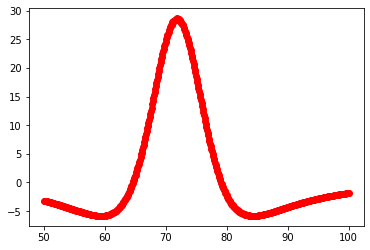

In [8]:
df = T_Cy.loc[(T_Cy['z'] >50)&(abs(T_Cy['r']) == 0.0)]
#plt.ylim(3,4)
plt.scatter(df["z"],df["Bz"], color='r')

In [9]:
#parameters, covariance = curve_fit(crystal_ball_norm, df['z'], df['Bz'],[70.,10.,70,10]) #use in case of the normalized distribution 

In [10]:
parameters, covariance = curve_fit(crystal_ball, df['z'], df['Bz'],[30,70.,3.,70,3.])

/home/hacharya/.local/lib/python3.8/site-packages/pandas/core/series.py:857: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)
/home/hacharya/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [11]:
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]
print(fit_A,fit_B,fit_C,fit_D,fit_E)

29.621990528347684 70.0 3.0 71.87146238145849 3.0674986429522986


/home/hacharya/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


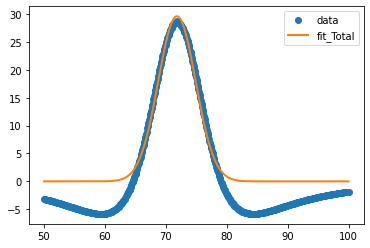

In [12]:
fit_y = crystal_ball(df['z'], fit_A, fit_B, fit_C,fit_D,fit_E)

plt.plot(df['z'], df['Bz'], 'o', label='data')
plt.plot(df['z'], fit_y, '-', label='fit_Total',lw=2)
plt.legend()
